# Predicting Chance of Survival for Titanic Passangers

In [20]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from dtree import DecisionTree
from dforest import DecisionForest
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC

In [28]:
df = pd.read_csv('train.csv')
df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# Categorical features include Pclass, Sex, SibSp, Parch, Cabin, Embarked
# Continuous features include Age, Fare

# Exploratory Data Analysis



In [4]:
df.shape

(891, 12)

In [5]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Text(0,0.5,'Percent Died')

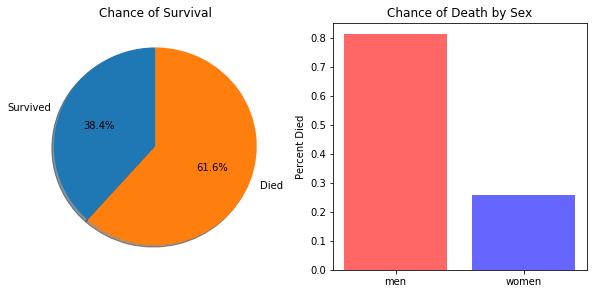

In [6]:
color = ['r', 'b', 'g']

fig = plt.figure(figsize = (10,10))
fig = fig.tight_layout()


plt.subplot2grid((2,2), (0,0))
plt.title("Chance of Survival")
sizes = [df.loc[df['Survived'] == 1].shape[0], df.loc[df['Survived'] == 0].shape[0]]
plt.pie(sizes, labels=['Survived', 'Died'], autopct='%1.1f%%',
        shadow=True, startangle=90)  

plt.subplot2grid((2,2), (0,1))
plt.title("Chance of Death by Sex")
menWomen = [df.Survived[df['Sex'] == 'male'].value_counts(normalize = True)[0],
            df.Survived[df['Sex'] == 'female'].value_counts(normalize = True)[0]]
menWomenLable = ['men', 'women']
plt.bar(menWomenLable, menWomen, alpha = 0.6, color = color)
plt.ylabel('Percent Died') 



# Survived


Text(0,0.5,'Percent Died')

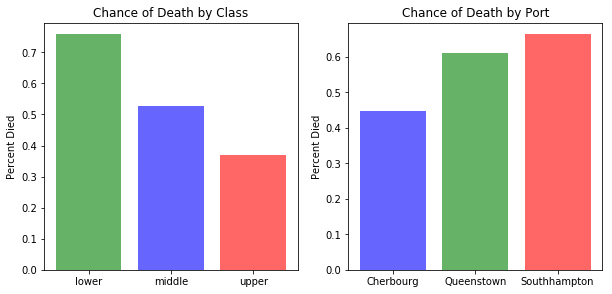

In [7]:
color = ['r', 'b', 'g']

fig = plt.figure(figsize = (10,10))
plt.subplot2grid((2,2), (0,0))
plt.title("Chance of Death by Class")
classLevel = [df.Survived[df['Pclass'] == 1].value_counts(normalize = True)[0],
            df.Survived[df['Pclass'] == 2].value_counts(normalize = True)[0],
            df.Survived[df['Pclass'] == 3].value_counts(normalize = True)[0]]
classLable = ['upper', 'middle', 'lower']
plt.bar(classLable, classLevel, alpha = 0.6, color = color)
plt.ylabel('Percent Died')

plt.subplot2grid((2,2), (0,1))
plt.title("Chance of Death by Port")
classLevel = [df.Survived[df['Embarked'] == 'S'].value_counts(normalize = True)[0],
            df.Survived[df['Embarked'] == 'C'].value_counts(normalize = True)[0],
            df.Survived[df['Embarked'] == 'Q'].value_counts(normalize = True)[0]]
classLable = ['Southhampton', 'Cherbourg', 'Queenstown']
plt.bar(classLable, classLevel, alpha = 0.6, color = color)
plt.ylabel('Percent Died') 

In [8]:
# AGE
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

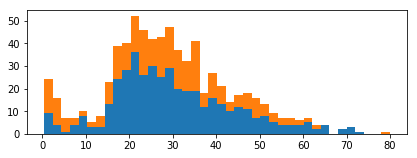

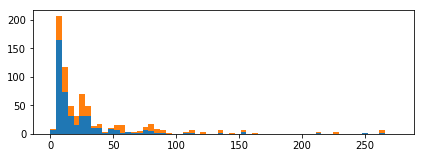

In [9]:
survived = df.loc[df['Survived'] == 1]
survived = survived[pd.notnull(survived['Age'])]

died = df.loc[df['Survived'] == 0]
died = died[pd.notnull(died['Age'])]

fig = plt.figure(figsize = (15,5))
plt.subplot2grid((2,2), (0,0))
plt.hist([died.Age.values, survived.Age.values], 40, stacked=True, label=[])
plt.show()

fig = plt.figure(figsize = (15,5))
plt.subplot2grid((2,2), (1,0))
plt.hist([died.Fare.values, survived.Fare.values], 60, stacked=True, label=[], range=(0,275))
plt.show()

# Feature Selection

## Feature Transformations

In [10]:
def ageSet(row):
    if row.Age <= 18:
        age = 0
    elif row.Age <= 35:
        age = 1
    elif row.Age <= 50:
        age = 2
    else:
        age = 3
    return age

In [11]:
#Specify someone as alone if they have no, siblings, parents, or children
def ticketPriceSet(row):
    index = row.Pclass
    if row.Fare > row.meanTicketPrice:
        ticketPrice = 1
    else:
        ticketPrice = 0
    return ticketPrice
#Maybe: add method to find if have children

In [12]:
def ticketPriceSet(row):
    index = row.Pclass
    if row.Fare > row.meanTicketPrice:
        ticketPrice = 1
    else:
        ticketPrice = 0
    return ticketPrice

In [13]:
def aloneSet(row):
#TODO Create status for if have parent or child
#If traveling alone then alone = 1
    alone = 0
    if int(row.SibSp) == 0 and int(row.Parch) == 0:
        alone = 1
    return alone

In [14]:

def titanicClean(df, ageContinuous = False):
    #made id an index
    df = df.set_index('PassengerId')

    df = df.drop([])

    # replace age with child young adult elder
    # if age is unknown Elder
    print(df.columns)
    if ageContinuous:
        df.Age = df.Age.fillna(method = 'bfill')
    else:
        df['AgeClass'] = df.apply(ageSet, axis = 1)
        df = df.drop(['Age'], axis = 1)
    #Create alone
    df['Alone'] = df.apply(aloneSet, axis = 1)


    #find mean of fare
    meanPrice = []
    for i in np.unique(df['Pclass']):
        meanPrice.append(df.Fare[df['Pclass'] == int(i)].mean(axis = 0))
    meanPrice = [0] + meanPrice

    #create column of array out of mean array
    #need to do this b/c apply function is weird
    tempTicketMean = []
    for index, row in df.iterrows():
        tempTicketMean.append(meanPrice[row.Pclass])    

    #Create ticket Price Column
    df['meanTicketPrice'] = tempTicketMean
    df['ticketPrice'] = df.apply(ticketPriceSet, axis = 1)

    df.Embarked = df.Embarked.fillna(value = 'S')
    #Change female to int
    df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})


    df['Embarked'] = df['Embarked'].map({'Q': 1, 'S': 0, 'C':2})
    #drop uneeded columns
    df = df.drop(['Name','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'meanTicketPrice'],axis = 1)

    df = pd.get_dummies(data = df, columns=['Pclass', 'AgeClass', 'Embarked'])

    return df

# Baseline Model

In [15]:
#Baseline: If upperclass, women, or younger than 12 Survive
def baseLine(row):
    if row.Pclass == 1:
        survived = 1
    elif row.Sex == 'female':
        survived = 1
    elif row.Age <= 12:
        survived = 1
    else:
        survived = 0
    return str(row.PassengerId) + " " + str(survived)

def baselinePredict(X):
    predict = X.apply(baseLine, axis = 1)
    return  pd.DataFrame(predict.str.split(' ',1).tolist(),
                         columns = ['PassengerId','Predict']).apply(pd.to_numeric)

In [16]:
def scoreBaseline(test):
    predict = baselinePredict(test)
    merged = pd.merge(test,predict)
    answers = pd.read_csv('gender_submission.csv')
    final = pd.merge(merged, answers, on = 'PassengerId')
    print('Baseline Predition')
    print((final.Survived == final.Predict * 1).sum()/ merged.shape[0])

In [17]:
dfTest = pd.read_csv('test.csv')
scoreBaseline(dfTest)


Baseline Predition
0.8349282296650717


# Model Selection
### Decision Tree
Desition tree is the most apropriate model for this projet becase for two clear reasons. First: our baseline predition was 83% correct. This means the test can be accurately represented by only a couple of key features -- you can't discount features as easily with a model based on a linear hyperplane and weight vector. A decision tree works better when there are important features to split on. This helps the split function. Additionally, the Titanic dataset is full of disrete variables. These are variables that an be split on with a deision tree but form ugly patterns when graphed. It's difficult to draw a linear separator or do a KNN prediction that doesn't miss points.



### Not Decision Forest
Actually a decision forest might be better





In [27]:
df1 = pd.read_csv('train.csv')
df2 = pd.read_csv('test.csv')
df3 = pd.read_csv('gender_submission.csv')
titanicClean(df1, ageContinuous=False).head(7)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')


,Survived,Sex,Alone,ticketPrice,Pclass_1,Pclass_2,Pclass_3,AgeClass_0,AgeClass_1,AgeClass_2,AgeClass_3,Embarked_0,Embarked_1,Embarked_2
PassengerId,,,,,,,,,,,,,,
1,0,0,0,0,0,0,1,0,1,0,0,1,0,0
2,1,1,0,0,1,0,0,0,0,1,0,0,0,1
3,1,1,1,0,0,0,1,0,1,0,0,1,0,0
4,1,1,0,0,1,0,0,0,1,0,0,1,0,0
5,0,0,1,0,0,0,1,0,1,0,0,1,0,0
6,0,0,1,0,0,0,1,0,0,0,1,0,1,0
7,0,0,1,0,1,0,0,0,0,0,1,1,0,0


In [24]:
def train_data(df):
    df = titanicClean(df, ageContinuous = False)
    y = df.iloc[:, 0].values
    X = df.iloc[:, 1:].values
    return X, y
    

def test_data(df1, df2):
    df1 = titanicClean(df1, ageContinuous = False)
    X = df1.values
    y = df2.set_index('PassengerId')
    y = y.values
    y = y.flatten()
    return X, y
    
X_train, y_train = train_data(d1)
X_test, y_test = test_data(df2, df3)

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
clfs = [SVC(C=1.0, kernel='rbf'), 
        LinearSVC(penalty='l2', C=1.0, max_iter=1000),
        LogisticRegression(),
        DecisionTreeClassifier(max_depth=4, splitter='best'),
        RandomForestClassifier(n_estimators = 3, max_depth=4),
        DecisionTree(max_depth=4),
        DecisionForest(n_estimators=5, bootstrap=True),
        DecisionForest(n_estimators=100, russells_method=True)]

for clf in clfs:
    clf.fit(X_train, y_train)
    print("%s: \t[%f/%f]" % (clf.__class__.__name__, clf.score(X_train, y_train), clf.score(X_test, y_test)) )
    if isinstance(clf, DecisionTreeClassifier):
        sklearn.tree.export_graphviz(clf, out_file='tree.dot')